In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import copy

In [2]:
img = cv.imread('media/img2.jpg')
img_to_hide = cv.imread('media/test.jpg')

In [3]:
def hide_image(img_off, img_hid):
    bufor_off = copy.deepcopy(img_off)
    bufor_hid = np.zeros(img_off.shape, dtype = int)
    bufor_hid[:img_hid.shape[0], :img_hid.shape[1],:] = copy.deepcopy(img_hid)
    return(bufor_off & 0xf0 | bufor_hid >> 4)
    
def decypher_photo(img_dec):
    return((img_dec & 0xf) << 4)

In [4]:
enriched = hide_image(img, img_to_hide)
decyphered = decypher_photo(enriched)

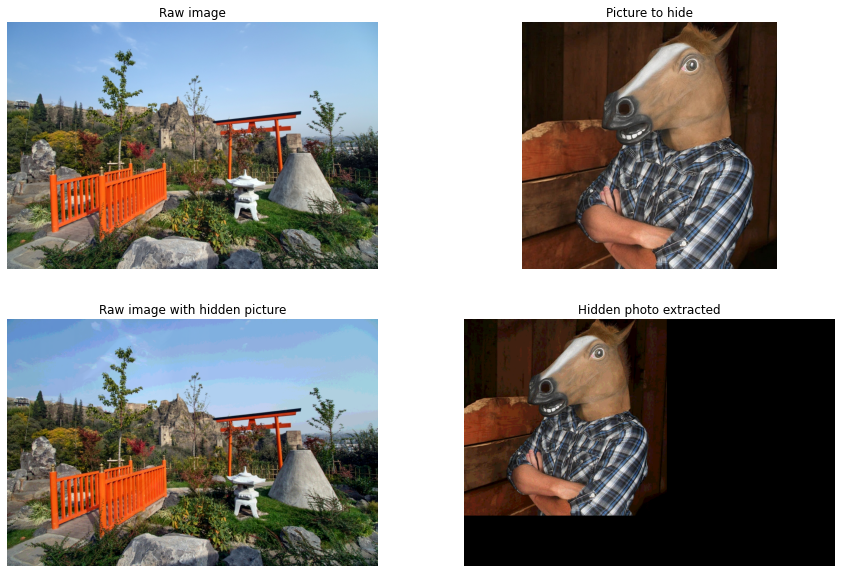

In [5]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.title("Raw image")
fig.add_subplot(2, 2, 2)
plt.imshow(img_to_hide[:,:,::-1])
plt.axis('off')
plt.title("Picture to hide")
fig.add_subplot(2, 2, 3)
plt.imshow(enriched[:,:,::-1])
plt.axis('off')
plt.title("Raw image with hidden picture")
fig.add_subplot(2, 2, 4)
plt.imshow(decyphered[:,:,::-1])
plt.axis('off')
plt.title("Hidden photo extracted")
plt.show()

In [6]:
cv.imwrite("enriched.png", enriched)
cv.imwrite("enriched.jpg", enriched)
cv.imwrite("enriched.bmp", enriched)

True

In [7]:
load_jpg = cv.imread("enriched.jpg")
load_png = cv.imread("enriched.png")
load_bmp = cv.imread("enriched.bmp")
dec_load_jpg = decypher_photo(cv.imread("enriched.jpg"))
dec_load_png = decypher_photo(cv.imread("enriched.png"))
dec_load_bmp = decypher_photo(cv.imread("enriched.bmp"))

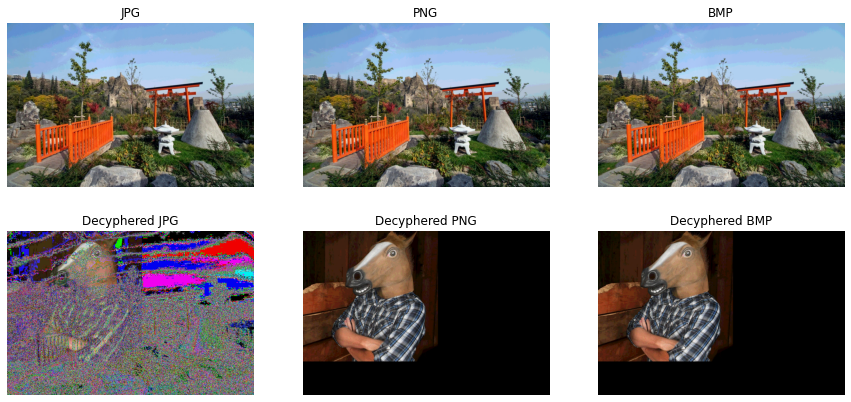

In [8]:
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(2, 3, 1)
plt.imshow(load_jpg[:,:,::-1])
plt.axis('off')
plt.title("JPG")
fig.add_subplot(2, 3, 2)
plt.imshow(load_png[:,:,::-1])
plt.axis('off')
plt.title("PNG")
fig.add_subplot(2, 3, 3)
plt.imshow(load_bmp[:,:,::-1])
plt.axis('off')
plt.title("BMP")
fig.add_subplot(2, 3, 4)
plt.imshow(dec_load_jpg[:,:,::-1])
plt.axis('off')
plt.title("Decyphered JPG")
fig.add_subplot(2, 3, 5)
plt.imshow(dec_load_png[:,:,::-1])
plt.axis('off')
plt.title("Decyphered PNG")
fig.add_subplot(2, 3, 6)
plt.imshow(dec_load_bmp[:,:,::-1])
plt.axis('off')
plt.title("Decyphered BMP")
plt.show()